<a href="https://colab.research.google.com/github/Dots11/DavesProjects/blob/master/08_Intro_to_NLP_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to NLP Fundamentals in TensorFlow
NLP has the goal of deriving information out of natural language( could be sequence or speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq).


## Check our GPU

In [ ]:
!nvidia-smi

Sun Oct  2 11:59:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get helper functions 

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import a series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-10-02 11:59:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-02 11:59:46 (57.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text sample of Tweets labelled as disaster or not disaster).

See the original source here: https://www.kaggle.com/competitions/nlp-getting-started

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-10-02 11:59:50--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-10-02 11:59:50 (113 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Unzip data

unzip_data("nlp_getting_started.zip")

# we get sample_submission, test and train.csv

## Visualizing a text data

To visualize our text samples, we first have to read them in, one way to do so is to use Python: https://realpython.com/read-write-files-python/

But ideally to get visual right away.

So another way to do this is to use pandas...

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # 'frac' what % should we shuffle? 1 represents 100%, 'random_state' sets shuffle in particular order e.g. '42'
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
train_df["text"][5448]

'DT @georgegalloway: RT @Galloway4Mayor: \x89ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q'

In [ ]:
# What does the test dataframe look like?
test_df.head()

# same as train dataframe except no targets column

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples are there in each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

Looks pretty balanced, though if your dataset is imbalanced, refer to this link on tensorflow: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
This will recommend a few changes to resolve the imbalanced dataset

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training samples
import random
random_index = random.randint(0, len(train_df)-5) # Create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index + 5].itertuples(): # returns tuples of ('text', 'target')
  _, text, target = row # "_" gets rid of the index.
  print(f"Target:\n{target}\n", "(real_disaster)" if target > 0 else "(not a real disaster)") # if target = "1" it is a "real disaster", else it is "not a disaster"
  print(f"Text:\n{text}\n")
  print("---\n")


Target:
1
 (real_disaster)
Text:
#SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.

---

Target:
0
 (not a real disaster)
Text:
Summer #summervibes #california #puppy #pitmix #rescued #brixton #banksy #happy #mybabies https://t.co/7VoVkTXsPo

---

Target:
1
 (real_disaster)
Text:
There's a weird siren going off here...I hope Hunterston isn't in the process of blowing itself to smithereens...

---

Target:
0
 (not a real disaster)
Text:
@_RedDevil4Life_ @ManUtd destroyed!??

---

Target:
1
 (real_disaster)
Text:
the sunset boys wreck my bed   original 1979 usa gimp label  vinyl 7' 45  newave http://t.co/X0QLgwoyMT http://t.co/hQNx8qMeG3

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(), # expects train_test_split data to be in the form of numpy arrays
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size = 0.1, # use 10% of training data for validation split
                                                                            random_state = 42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
len(train_df_shuffled)

7613

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealling with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this:

* Tokenization - direct mapping of token (a token could be a word or a character) to a number.

* Embedding - create a matrix of feature vectors for each token (the size of the feature vector can be defined and this embedding can be learned).

### Text Vectorization

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens= 1000, # how many words in the vocabulary (automtically add <OOV> "out of vocabulary")
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None, # create groups of n-words?, if set to "None", treats every token on their own rather grouping together
                                    output_mode = "int", # how to map tokens to numbers
                                    output_sequence_length = None, # How long do you want your sequence to be? If set to 'None' Automatically pads each sequence to the longest sequence e.g. smaller sequences get padded with zeroes at the end until matches longest sequence.
                                    pad_to_max_tokens = True) # 'True' allows to pad zeros at the end of each token to match the longest token

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the averagae number of tokens (words) in our training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?) e.g. if tweet 30 words long, it will only see first 15

# Resetting this to set specified parameters needed
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
That horrible moment when u open up the dryer and it looks like a snowy blizzard cuz u left a piece of paper in your jeans pocket ??      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  16,  395, 1005,   45,  142, 1497,   27,    2, 5766,    7,   15,
         287,   25,    3, 8339]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [ ]:
# '[UNK]' is a word outside the top "10,000" (or other value set as max_vocab_length)
# As '[UNK]' is a top 5 word, as this depends on the no. of training sentences we have. We can change the vocab size e.g. 20,000 to increase capacity to memorize unique words, therefore making '[UNK]' least common.

In [ ]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

### So we created a text vectorizer!

### Creating an Embedding using an Embedding Layer

To make our embedding, we are going to use TensorFlow's embedding layer

The parameters we care most about for our embedding layer:

* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedded vector, for example, a value of 100 would mean each token gets represented by a vector 100 long.
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim = 128, # output shape, divisible by '8'
                             embeddings_initializer = "uniform", #default initialize randomally
                             input_length = max_length, # how long is each input
                             name = "embedding_1"
                             )
embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed



Original text:
Experts in France begin examining airplane debris found on Reunion Island http://t.co/LsMx2vwr3J French air accident experts on WednesdayÛ_      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01936599, -0.01923897,  0.03844601, ...,  0.0098206 ,
          0.01055583, -0.03042114],
        [-0.01981794, -0.03104698, -0.02752581, ...,  0.00884819,
          0.03085944,  0.00997077],
        [-0.04287907,  0.03893036, -0.03464825, ...,  0.00242417,
          0.00551404, -0.00316463],
        ...,
        [ 0.01437361, -0.03186138,  0.03752223, ..., -0.04052367,
         -0.01712488,  0.02386818],
        [ 0.04244764, -0.01196362,  0.01855623, ..., -0.04782499,
          0.04605179,  0.04177728],
        [ 0.01035818,  0.01249452, -0.02984692, ..., -0.00978519,
         -0.02944517,  0.04714574]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence # indexing to the very first token of the shape (1,15,128)


(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.01936599, -0.01923897,  0.03844601,  0.0106287 , -0.00686228,
         0.01971902,  0.00276736,  0.03402043,  0.0060725 ,  0.03584895,
        -0.02960426, -0.04037102,  0.041316  , -0.04000203, -0.0477327 ,
         0.00256578,  0.01953074, -0.0432955 ,  0.04921087, -0.00181349,
         0.00884215,  0.02408506,  0.01837048,  0.037956  , -0.02218289,
        -0.01323148, -0.01814038,  0.04723588,  0.04060651, -0.00328568,
         0.01737184,  0.04075059, -0.03089582,  0.02638311,  0.03045132,
        -0.03895633, -0.0346444 ,  0.04246453,  0.02144564, -0.00613786,
        -0.04070634, -0.03222015, -0.01610126,  0.01424395,  0.03685733,
         0.025098  ,  0.00697974,  0.01708604, -0.03979281,  0.01401288,
         0.04286054, -0.02194338,  0.02987895,  0.02347634,  0.01030006,
         0.01840207, -0.03490187,  0.01339832,  0.02839849,  0.04494463,
         0.01193274, -0.02866137,  0.00750718, -0.03039608,  0.01822821,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Nave Bayes (baseline), from the Sklearn ML map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html?highlight=choosing+right+estimator 
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data.

How are we going to approach all of these?

Use the standard steps in modelling with TensorFlow

* Create the model
* Build the model
* Fit the model
* Evaluate our model

### Model 0: Getting a baseline

As for all machine learning modelling experiments, it's important to  create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

**Note:** it's common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline (like the sequential)
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels) # in keras its 'evaluate', and sklearn its 'score'
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences) # same as tensorflow there is a predict method in sklearn
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

### Create an evaluation funciton for our model experiments

We could evaluate our model's predictions with different metrics every time, however, this will be cumbersome and could easily be fixed with a function

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

For a deep overview of many different evaluation methods please see the Scikit learn documentation https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted") #"_" represents a blank variable we don't want to use
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results



In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
from helper_functions import calculate_results

### Model 1: A simple dense model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API # 'Functional API' is more customizable than the 'Sequential API'
from tensorflow.keras import layers
inputs = layers.Input(shape =(1, ), dtype=tf.string) # inputs are 1-dimensional strings, and shape is '(1, )' to see 1 sequence at a time.
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized inputs
x = layers.GlobalAveragePooling1D()(x) # Lower the dimensionality of the embedding (try running the model without this layer and see what happens). # Condenses the feature vector for each token to one vector.
#x = layers.GlobalMaxPool1D()(x) # yielded similar results to the layer above
outputs = layers.Dense(1, activation = "sigmoid")(x) # '1' output because we are binary classifying it to be either 'disaster' or 'no disaster'. We want binary outputs so we use sigmoid activation 
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
# Check embedding
embedding

In [ ]:
model_1.summary()
# in the summary, we pass one input through to the input layer as a string sequence at a time, then each inputted sequence gets text vectorized to be 15 integers long.
# The vectorized data then gets embedded, adding a dimension to the end e.g. 128 resulting in many parameters. Each of the 15 tokens gets represented as a 128 long feature vector 
# Then each feature vector is then passed through the dense layer and outputs with the size of '1'

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels), # combining both into a 'tuple'
                              callbacks=[create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20221002-115956
Epoch 1/5
215/215 [==============================] - 5s 6ms/step - loss: 0.6117 - accuracy: 0.6920 - val_loss: 0.5351 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4421 - accuracy: 0.8189 - val_loss: 0.4724 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3478 - accuracy: 0.8610 - val_loss: 0.4551 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2847 - accuracy: 0.8897 - val_loss: 0.4663 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2382 - accuracy: 0.9110 - val_loss: 0.4772 - val_accuracy: 0.7795


In [ ]:
baseline_results


{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7795


[0.47717714309692383, 0.7795275449752808]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape # if multip

(762, 1)

In [ ]:
# Checking the first prediction (looks all good!)
model_1_pred_probs[0]

array([0.40661392], dtype=float32)

In [ ]:
model_1_pred_probs

array([[0.40661392],
       [0.83657897],
       [0.99749917],
       [0.12710689],
       [0.10593968],
       [0.94930077],
       [0.9286818 ],
       [0.99326754],
       [0.96876615],
       [0.28698525],
       [0.13499144],
       [0.7138778 ],
       [0.06523987],
       [0.18799509],
       [0.00486957],
       [0.16077486],
       [0.03537278],
       [0.09027416],
       [0.29134107],
       [0.59382504],
       [0.914466  ],
       [0.04645042],
       [0.4916934 ],
       [0.09402687],
       [0.9613288 ],
       [0.99880695],
       [0.03580347],
       [0.08413623],
       [0.03090259],
       [0.2131401 ],
       [0.60610366],
       [0.2716794 ],
       [0.518601  ],
       [0.21170762],
       [0.55463344],
       [0.0656057 ],
       [0.99497664],
       [0.17106676],
       [0.03676022],
       [0.99849   ],
       [0.21371281],
       [0.02380392],
       [0.3466438 ],
       [0.07981589],
       [0.69101334],
       [0.98610663],
       [0.32506046],
       [0.926

In [ ]:
# From the above, we had condensed our model from 15 vectors of 128 to one vector of 128, by adding a single layer 'globalpoolingaverage1D()'

In [ ]:
# Next we need to compare apples to apples, in other words our pred probs to the val_labels, we need to convert model prediction probabilities to label format

In [ ]:
model_1_pred_probs[:10]

array([[0.40661392],
       [0.83657897],
       [0.99749917],
       [0.12710689],
       [0.10593968],
       [0.94930077],
       [0.9286818 ],
       [0.99326754],
       [0.96876615],
       [0.28698525]], dtype=float32)

In [ ]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # tf.squeeze gets rid of the 1 dimension '1' by size '1' from (762,1) to (762)
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 77.95275590551181,
 'precision': 0.7816545659065345,
 'recall': 0.7795275590551181,
 'f1': 0.7774022539420016}

In [ ]:
# Now see our baseliine results for comparison (model_0)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
# Comparing both results numerically via numpy
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
# All 4 metrics from the baseline_results are higher than model_1_results

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10] # shows the top 10,000 words, though we'll see first 10.

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model_1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for ~5 epochs)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0] # '[0]' to get the first matrix
print(embed_weights.shape) # same size as vocab size and embedding_dim (output dim of our embedding layer)

(10000, 128)


In [ ]:
# so our embedding matrix has a slot for every token in our vocabulary (10000), with each token embedded into a 128 length vector e.g. [0.365,0.848,0.453,0.932,...,0.910] (0.910 the 128th)

In [ ]:
embed_weights

array([[-0.02356558, -0.02438626,  0.06662467, ...,  0.0025911 ,
         0.02161844,  0.00505348],
       [ 0.03875388,  0.02505642, -0.0461161 , ..., -0.01898527,
         0.00394818,  0.02104901],
       [-0.02789298,  0.02657246,  0.00972267, ...,  0.03770961,
        -0.02348651, -0.01865199],
       ...,
       [-0.01165347,  0.01245583, -0.0361015 , ...,  0.00047594,
         0.02410677,  0.01299233],
       [-0.08914636, -0.01690197,  0.04235037, ...,  0.00556227,
        -0.007255  ,  0.0247116 ],
       [-0.06976751, -0.03830614,  0.04709632, ..., -0.06313104,
        -0.06000149,  0.06617491]], dtype=float32)

Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector: https://projector.tensorflow.org/

And TensorFlow also has an incredible guide on word embeddings themselves

In [ ]:
# Create embedding files (we got this from TensoFlow's word embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# # Downloadfiles from Colab to upload to projector
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass


Downloading the files above we can visualize them using https://projector.tensorflow.org/ and clicking the "load" button on the left hand side.

**Resources:** if you'd like to know more about embeddings, I'd encourage you to check out:
* Jay Alammar's visualized word2vec post: https://jalammar.github.io/illustrated-word2vec/
* TensorFlow's Word Embeddings guide: https://www.tensorflow.org/text/guide/word_embeddings

## Recurrent Neural Networks (RNN's)
RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

**Resources:** If you want an overview of the internals of a recurrent neural network, see the following: 
- MIT's sequence modelling lecture: https://www.youtube.com/watch?v=qjrad0V0uJE

- Chris Olah's intro to LSTM's: https://colah.github.io/posts/2015-08-Understanding-LSTMs/

- Andrej Karpathy's the unreasonable effectiveness of recurrent neural networks: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

- Alammar's analysis of the Karpathy's rnn effectiveness: https://www.youtube.com/watch?v=o9LEWynwr6g

### Model 2: LSTM
LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:

`Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)`

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1, ), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(units = 64, return_sequences=True)(x) # When you are stacking RNN cells together, you need to set return_sequences = True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation = "relu")(x)
#print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [ ]:
# Fit the model
model_2.history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20221002-120009
Epoch 1/5
215/215 [==============================] - 8s 12ms/step - loss: 0.2257 - accuracy: 0.9253 - val_loss: 0.5456 - val_accuracy: 0.7887
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1559 - accuracy: 0.9413 - val_loss: 0.6489 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1240 - accuracy: 0.9533 - val_loss: 0.6861 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1028 - accuracy: 0.9585 - val_loss: 0.6697 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0830 - accuracy: 0.9672 - val_loss: 0.8830 - val_accuracy: 0.7730


In [ ]:
# Make predictions with LGTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[2.1046540e-02],
       [8.9121175e-01],
       [9.9986362e-01],
       [7.6267540e-02],
       [5.8413943e-04],
       [9.9916339e-01],
       [9.2599988e-01],
       [9.9988723e-01],
       [9.9983370e-01],
       [4.8352557e-01]], dtype=float32)

In [ ]:
# Convert model_2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.29658792650919,
 'precision': 0.7738445106757977,
 'recall': 0.7729658792650919,
 'f1': 0.7713337273803944}

In [ ]:
# See model_1 results
model_1_results

{'accuracy': 77.95275590551181,
 'precision': 0.7816545659065345,
 'recall': 0.7795275590551181,
 'f1': 0.7774022539420016}

In [ ]:
# See baseline (model 0) results
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model_3 :GRU (Gated recurrent unit)

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Create a GRU model
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#print(x.shape)
#x = layers.GRU(units = 64, return_sequences = True)(x) # if you want to stack recurrent layers on top of each other, you need recurrent_sequences = True
# print(x.shape)
#x = layers.LSTM(64, return_sequences = True)(x)
# print(x.shape)
#x = layers.Dense(64, activation = "relu")(x)
# print(x.shape)
#x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
model_3.compile(loss = "binary_crossentropy",
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 
                                                                       "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20221002-120026
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1563 - accuracy: 0.9381 - val_loss: 0.7555 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0825 - accuracy: 0.9689 - val_loss: 0.8060 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0672 - accuracy: 0.9727 - val_loss: 0.9114 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0571 - accuracy: 0.9752 - val_loss: 1.2495 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0499 - accuracy: 0.9772 - val_loss: 1.0437 - val_accuracy: 0.7743


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[1.3779262e-03],
       [8.6996049e-01],
       [9.9987388e-01],
       [1.3905753e-01],
       [1.6747060e-04],
       [9.9964023e-01],
       [8.9114064e-01],
       [9.9995852e-01],
       [9.9990320e-01],
       [9.8840547e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_3 results
model_3_results = calculate_results(y_true = val_labels,
                                         y_pred = model_3_preds
                                         )
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7757380419380466,
 'recall': 0.7742782152230971,
 'f1': 0.7723566516531356}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidireectional RNN goes from right to left as well as left to right.

In [ ]:
# Create the layers of our bidirectional model_4
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
#x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidirectional_LSTM")

In [ ]:
model_4.summary() # bidirectional doubles the vector value e.g 64 to 128 as it reads left to right

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params

In [ ]:
# Compile our model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit our model
history_model_4 = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20221002-120041
Epoch 1/5
215/215 [==============================] - 8s 16ms/step - loss: 0.1106 - accuracy: 0.9625 - val_loss: 0.9418 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0518 - accuracy: 0.9764 - val_loss: 1.2554 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0444 - accuracy: 0.9801 - val_loss: 1.1849 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0418 - accuracy: 0.9822 - val_loss: 1.1810 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0397 - accuracy: 0.9815 - val_loss: 1.5229 - val_accuracy: 0.7651


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[1.0158619e-02],
       [6.9689065e-01],
       [9.9997497e-01],
       [1.8389753e-01],
       [1.1384934e-05],
       [9.9987292e-01],
       [9.9788046e-01],
       [9.9998796e-01],
       [9.9997437e-01],
       [9.9945110e-01]], dtype=float32)

In [ ]:
#convert pred_probs to pred labels
model_4_probs = tf.squeeze(tf.round(model_4_pred_probs))
model_4_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results from our model_4
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_probs)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.7649467964142894,
 'recall': 0.7650918635170604,
 'f1': 0.7650074262541928}

In [ ]:
# See our model_3 results
model_3_results

{'accuracy': 77.42782152230971,
 'precision': 0.7757380419380466,
 'recall': 0.7742782152230971,
 'f1': 0.7723566516531356}

In [ ]:
# Bidirectionality has given worse results, though try to best the baseline

## Convolutional Neural Networks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width)... however our text data is 1D.

Previously we've Conv2D for our image data but now we're going to use Conv1D

The typical struction of a Conv1D model for sequences (in our case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities
```

### Model 5: Conv1D
For different explanations of parameters see:
* https://poloclub.github.io/cnn-explainer/
* Same vs valid padding: https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sequence into an embedding
conv_1d = layers.Conv1D(filters = 32, # this also referred to an ngram of 5 (meaning it looks at 5 words at a time)
                        kernel_size = 5,
                        strides = 1, # default
                        activation = "relu",
                        padding = "valid") # default = "valid", the output is smaller than the input shape, and "same" is output the same shape as input 
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D() # GlobalMaxPool takes the maximum across a given dimension, while GlobalAveragePool takes the aveage dimension
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature" or " get the feature with the maximum value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
#embedding_test

In [ ]:
#conv_1d_output # many '0's' because relu converts negative values to '0'

In [ ]:
#max_pool_output # we condense it into a single feature vector of size '32'

In [ ]:
# Create the layers of our bidirectional model_4
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string) # shape set to one sequence per input
x = text_vectorizer(inputs) # map our inputs into integers
x = embedding(x) # embed the integer form of our inputs, to represent them as tensors
x = layers.Conv1D(filters = 64, kernel_size = 5, strides=1, activation = "relu", padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name = "model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Get a summary of our Conv1D model
model_5.summary()


Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model

model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20221002-120113
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.1236 - accuracy: 0.9593 - val_loss: 0.8972 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0733 - accuracy: 0.9730 - val_loss: 1.0045 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0604 - accuracy: 0.9771 - val_loss: 1.1053 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0561 - accuracy: 0.9747 - val_loss: 1.1800 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0503 - accuracy: 0.9783 - val_loss: 1.2011 - val_accuracy: 0.7598


In [ ]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.1376977e-01],
       [6.7127478e-01],
       [9.9995685e-01],
       [5.5535093e-02],
       [5.1719081e-08],
       [9.9346018e-01],
       [9.8553813e-01],
       [9.9996185e-01],
       [9.9999952e-01],
       [8.7208998e-01]], dtype=float32)

In [ ]:
# Change our pred probabilities to label format
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results from our model 5
model_5_results = calculate_results(y_pred = model_5_preds,
                                    y_true = val_labels)
model_5_results

{'accuracy': 75.98425196850394,
 'precision': 0.7601337255372377,
 'recall': 0.7598425196850394,
 'f1': 0.7583542786286791}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4

Seehow the USE is trained here: https://arxiv.org/abs/1803.11175

USE stands for Universal Sentence Encoder

In [ ]:
sample_sentence

"There's a flood in my street!"

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50]) # get the first, and first 50 samples


tf.Tensor(
[-0.01157032  0.02485909  0.02878048 -0.01271501  0.03971539  0.0882776
  0.02680985  0.05589837 -0.0106873  -0.00597291  0.00639325 -0.0181952
  0.00030816  0.09105889  0.05874643 -0.03180627  0.01512473 -0.05162929
  0.00991365 -0.06865346 -0.04209305  0.02678981  0.03011008  0.00321067
 -0.0033797  -0.04787361  0.02266722 -0.00985925 -0.04063613 -0.0129209
 -0.04666385  0.056303   -0.03949255  0.00517688  0.02495828 -0.07014443
  0.02871508  0.04947681 -0.00633976 -0.08960193  0.02807116 -0.00808363
 -0.01360604  0.0599865  -0.10361787 -0.05195372  0.00232956 -0.02332528
 -0.03758106  0.03327731], shape=(50,), dtype=float32)


In [ ]:
embed_samples # when we pass 'sample_sentence' through the pretrained universal sentence encoder, this is what it outputs (first '50' embedding values) - turned our sentence into a numerical representation, a feature vector of 512 

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157032,  0.02485909,  0.02878048, ..., -0.00186123,
         0.02315825, -0.01485021],
       [ 0.03485871, -0.08845593, -0.01677878, ..., -0.02750705,
         0.03230238, -0.00820086]], dtype=float32)>

In [ ]:
embed_samples.shape 

TensorShape([2, 512])

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE") # empty vector, because the input to this layer can be of any variable length, though always output a 512 feature vector regardless.



In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer, # we don't need a text vectorization layer, as the USE module handles that for us
    layers.Dense(64, activation = "relu", name = "relu_layer_1"),
    #layers.Dense(64, activation = "relu", name = "relu_layer_2"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer") # we are working on a binary classification problem
], name = "model_6_USE")

# Compile
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 relu_layer_1 (Dense)        (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


Advantage of using a pretrained model like USE is that they are already trained, leaving us only training the dense layer (the output) layer.

In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = create_tensorboard_callback(SAVE_DIR,
                                                                      "tf_hub_sentence_encoder"))

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221002-120153
Epoch 1/5
215/215 [==============================] - 7s 18ms/step - loss: 0.5028 - accuracy: 0.7755 - val_loss: 0.4489 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4153 - accuracy: 0.8145 - val_loss: 0.4375 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4003 - accuracy: 0.8216 - val_loss: 0.4348 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3930 - accuracy: 0.8269 - val_loss: 0.4301 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3859 - accuracy: 0.8295 - val_loss: 0.4445 - val_accuracy: 0.8005


In [ ]:
# Get our model 6's predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:20]

array([[0.11733251],
       [0.63533396],
       [0.9854388 ],
       [0.19736943],
       [0.64113843],
       [0.59806424],
       [0.96564376],
       [0.96115464],
       [0.8800834 ],
       [0.08659372],
       [0.57058924],
       [0.38508287],
       [0.12238693],
       [0.34724176],
       [0.161966  ],
       [0.0227721 ],
       [0.3075304 ],
       [0.53729856],
       [0.2713363 ],
       [0.24727026]], dtype=float32)

In [ ]:
# Convert our USE TF Hub model predictions to a label format
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.], dtype=float32)>

In [ ]:
# Calculate our model 6's performance metrics
model_6_results = calculate_results(y_pred = model_6_preds,
                                    y_true = val_labels)
model_6_results

{'accuracy': 80.0524934383202,
 'precision': 0.8097952566853514,
 'recall': 0.800524934383202,
 'f1': 0.7966840570849284}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
len(train_df_shuffled)

7613

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [ ]:
# ## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET
# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42) # 'frac' is 10% of train data
# #train_10_percent.head(), len(train_10_percent)
# train_sentences_10_percent = train_10_percent["text"].to_list() # 'to_list' changes a series to a list
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)


**Note:** Be *very* careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [ ]:
# Making a better dataset split (no data leakage)
train_sentences_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_sentences_10_percent_split]
#len(train_10_percent)
train_labels_10_percent = train_labels[:train_sentences_10_percent_split]
len(train_labels_10_percent)

685

In [ ]:
# Check the number of each label in the updated training data subset
# y = np.array(train_labels_10_percent)

# np.bincount(y)#.sum()

#or
pd.Series(np.array(train_labels_10_percent)).value_counts() # not perfect match to train_df_shuffled but will do

0    406
1    279
dtype: int64

Roughly 10% of our shuffled 'train_df_shuffled' dataframe

In [ ]:
# Check the number of targets in our subset of data
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#approx 60:40 ratio across both value_counts the full and 10%. Both are representive.
# Whenever you are making a split in your dataset, ensure both sets are from the same distribution as the other one. This can be done randomally,

To recreate a model the same as the previous model you've created, you can use the `tf.keras.models.clone_model()` method, see more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [ ]:
# Let's build a model the same as model_6
#model_7  = tf.keras.models.clone_model(model_6) # handy but can't rename it
model_7 = tf.keras.Sequential([
    sentence_encoder_layer, # we don't need a text vectorization layer, as the USE module handles that for us
    layers.Dense(64, activation = "relu", name = "relu_layer_1"),
    #layers.Dense(64, activation = "relu", name = "relu_layer_2"),
    layers.Dense(1, activation = "sigmoid", name = "output_layer") # we are working on a binary classification problem
], name = "model_7_USE")

# Compile model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Get a summary (will be the same as model_6)
model_7.summary()


Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 relu_layer_1 (Dense)        (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "tf_hub_use_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_use_10_percent_correct_split/20221002-120215
Epoch 1/5
22/22 [==============================] - 2s 50ms/step - loss: 0.6718 - accuracy: 0.6292 - val_loss: 0.6548 - val_accuracy: 0.6575
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.6058 - accuracy: 0.7752 - val_loss: 0.5999 - val_accuracy: 0.7520
Epoch 3/5
22/22 [==============================] - 1s 29ms/step - loss: 0.5334 - accuracy: 0.8219 - val_loss: 0.5458 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4680 - accuracy: 0.8248 - val_loss: 0.5093 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 1s 34ms/step - loss: 0.4245 - accuracy: 0.8263 - val_loss: 0.4898 - val_accuracy: 0.7730


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.20169467],
       [0.59156674],
       [0.9066186 ],
       [0.36478794],
       [0.5907522 ],
       [0.6980603 ],
       [0.8600193 ],
       [0.82217526],
       [0.8498025 ],
       [0.15445231]], dtype=float32)

In [ ]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_pred = model_7_preds,
                                    y_true = val_labels)
model_7_results

{'accuracy': 77.29658792650919,
 'precision': 0.7730528656214299,
 'recall': 0.7729658792650919,
 'f1': 0.7718716556605149}

In [ ]:
model_6_results

{'accuracy': 80.0524934383202,
 'precision': 0.8097952566853514,
 'recall': 0.800524934383202,
 'f1': 0.7966840570849284}

Model 7, even though trained 10% of the data used by model_6, still performs very well

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1_simple_dense" : model_1_results,
                                  "2_lstm" : model_2_results,
                                  "3_gru" : model_3_results,
                                  "4_bidirectional" : model_4_results,
                                  "5_convld" : model_5_results,
                                  "6_tf_hub_use_encoder" : model_6_results,
                                  "7_tf_hub_use_encoder_10_percent" : model_7_results})
all_model_results = all_model_results.transpose()
#all_model_results

In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
#all_model_results

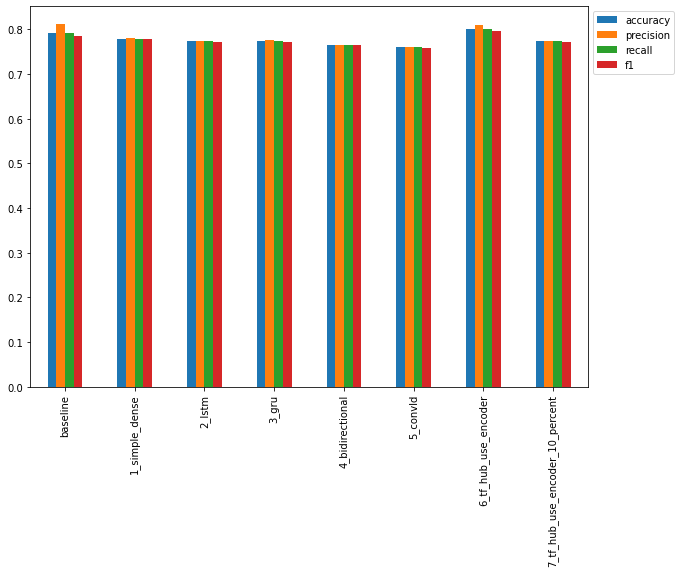

In [ ]:
# Plot and comparea all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor = (1.0, 1.0));

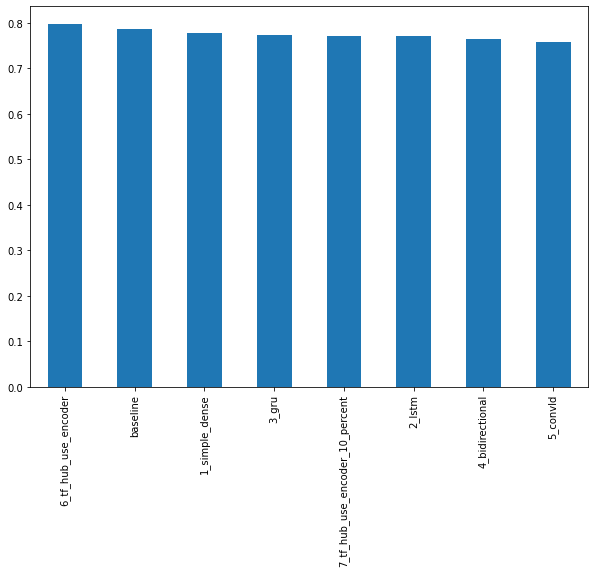

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize = (10, 7));

## Uploading our model training logs to TensorBoard.dev
We can further inspect our model's performance using TensorBoard.dev: https://tensorboard.dev/

In [ ]:
# Load model results on TensorBoard.dev
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP_7_models" \
  --description "Comparing 7 types of models on Twitter disaster dataset" \
  --one_shot # exit the uploader once uploading is finished


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) NO


Now I've ran the cell above, my modelling experiments are visible on TensorBoard.dev: https://tensorboard.dev/experiment/hNc6v5eLQryiJlKG2k525A/

**Resource:** TensorBoard is great for quickly tracking experiments but for larger scale experiments and a whole buch more tracking options, check out Weights & Biases: https://wandb.ai/site

In [ ]:
# #See the previous TensorBoard Dev experiments you've run...
# !tensorboard dev list

In [ ]:
# # If you need to delete an experiment from TensorBoard, you can run the following:
# !tensorboard dev delete --experiment_id #id here#

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFlow)

In [ ]:
# Checking our model_6 results
model_6_results

{'accuracy': 80.0524934383202,
 'precision': 0.8097952566853514,
 'recall': 0.800524934383202,
 'f1': 0.7966840570849284}

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom Hub Layer (required HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects ={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4445 - accuracy: 0.8005


[0.4444540739059448, 0.8005249500274658]

Our model_6 saved and loaded correctly using '.h5'.

Now let's save to the `SavedModel` format... (see more on this here:)
https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_Format")

In [ ]:
# Load in a model from the SavedModel format
load_mode_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_Format")

In [ ]:
# Evaluate model in SavedModel format
load_mode_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4445 - accuracy: 0.8005


[0.4444540739059448, 0.8005249500274658]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?

* And of these wrong examples which ones is it getting *most* wrong (those will prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa.

In [ ]:
# Download a pretrained model from Google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip # then add file from address end to unzip

--2022-10-02 12:03:16--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   111MB/s    in 9.1s    

2022-10-02 12:03:25 (101 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.i

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # they should be in label format

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create a DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)}) # squeeze our pred probs to 1D
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending = False)
most_wrong[:10] # False positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail() # and these are False Negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...
* `0` = not a disaster
* `1` = disaster

In [ ]:
# Check the false positives (model predicted 1 where it should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

-----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

-----

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

-----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

-----

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

-----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!


In [ ]:
# Check the false negatives (model predicted 0 where it should've been 0)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.055075809359550476
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.054603397846221924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.05459698289632797
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text\n{test_sample}\n")
  print("-----\n")

Pred: 0, Prob: 0.2628400921821594
Text
|LIVE NOW| Princes of the Apocalypse:  D&amp;D Encounters #meerkat http://t.co/oY9ES9FVlt

-----

Pred: 1, Prob: 0.6388808488845825
Text
12000 Nigerian refugees repatriated from Cameroon http://t.co/LeLYa0vDOg read /////

-----

Pred: 0, Prob: 0.3403383493423462
Text
??Water fight??
Penn park 6pm 
      BYOW
(Bring Your Own Weapons)

-----

Pred: 1, Prob: 0.9676203727722168
Text
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives

-----

Pred: 0, Prob: 0.022144079208374023
Text
Guess who's got a hilarious new piece on @RazedOnIt? @honeystaysuper! 51 Things You Should Never Say to a Mother Ever http://t.co/ikRHIb9x0a

-----

Pred: 1, Prob: 0.9439738988876343
Text
Middle East ÛÏHeat DomeÛ Causes Crippling Heat Wave in Israel http://t.co/41Lcb9aepR

-----

Pred: 1, Prob: 0.7452530264854431
Text
forestservice : RT dhsscitech: #Firefighters run into burning buildingsÛÓwe work on #tech tÛ_ http://t.co/KybQcSvrZa) http://t.co/Ih49kyMsMp


## Your challenge... predicting on tweets from the wild

Go to your favourite Twitter account and copu one of their latest Tweets.

Then pass that Tweet through out trained model.

It that Tweet a disaster or not disaster (according to the model)? Is the model right or wrong?

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "Released Ukrainian prisoner of war reveals torment at the hands of Russians"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 342,    1,    1,    6,  122, 2744,    1,   17,    2, 1666,    6,
           1,    0,    0,    0]])>

In [ ]:
# Making predictions on the test dataset and visualizing them

pred_prob = tf.squeeze(model_6_pretrained.predict([sample_sentence])) # our model expects a list as input
pred = tf.round(pred_prob)
print(f"Pred: {int(pred)}, Prob: {pred_prob}")
print(f"Text\n{sample_sentence}\n")
print("-----\n")

Pred: 1, Prob: 0.8949506878852844
Text
Released Ukrainian prisoner of war reveals torment at the hands of Russians

-----



A disaster was correctly predicted by our loaded pretrained model_6 

## The speed/score tradeoff

In [ ]:
model_6_results

{'accuracy': 80.0524934383202,
 'precision': 0.8097952566853514,
 'recall': 0.800524934383202,
 'f1': 0.7966840570849284}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
# Let's make a funciton to measure the time of prediciton
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model = model_6_pretrained,
                                                            samples = val_sentences)
model_6_total_pred_time,model_6_time_per_pred

(0.28642695500002446, 0.0003758883923884835)

Pretty quick!

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.01902775999997175, 2.497081364825689e-05)

In [ ]:
# Get the results of our pretrained model 6
model_6_pretrained_results = calculate_results(y_true = val_labels,
                                               y_pred = model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

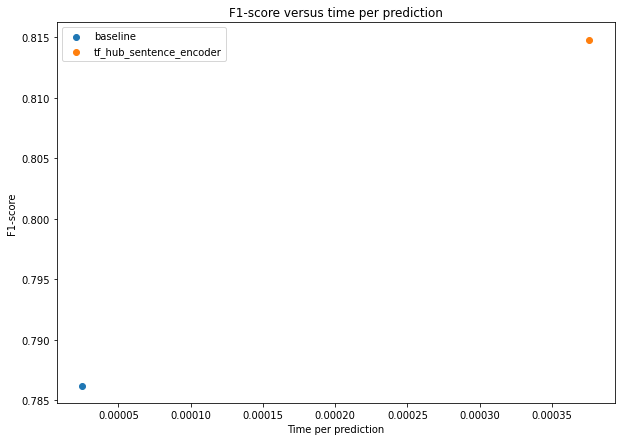

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label = "tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");

Question: is a 3% performance boost worth a x10 fold increase in making a prediction?

The ideal position for speed and performance is the top left corner on our plot